# Welcome!
Below, we will learn to implement and train a policy to play atari-pong, using only the pixels as input. We will use convolutional neural nets, multiprocessing, and pytorch to implement and train our policy. Let's get started!

(I strongly recommend you to try this notebook on the Udacity workspace first before running it locally on your desktop/laptop, as performance might suffer in different environments)

In [2]:
# install package for displaying animation
!pip install JSAnimation

# custom utilies for displaying animation, collecting rollouts and more
import pong_utils

%matplotlib inline

# check which device is being used. 
# I recommend disabling gpu until you've made sure that the code runs
device = pong_utils.device
print("using device: ",device)

Defaulting to user installation because normal site-packages is not writeable


/home/max/anaconda3/envs/udacity/lib/python3.9/site-packages/ale_py/roms/__init__.py:94: DeprecationWarning: Automatic importing of atari-py roms won't be supported in future releases of ale-py. Please migrate over to using `ale-import-roms` OR an ALE-supported ROM package. To make this warning disappear you can run `ale-import-roms --import-from-pkg atari_py.atari_roms`.For more information see: https://github.com/mgbellemare/Arcade-Learning-Environment#rom-management
  _RESOLVED_ROMS = _resolve_roms()


using device:  cuda:0


In [3]:
from pathlib import Path
if False or not Path('rars').is_dir():
    import urllib.request
    urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
    !pip install unrar
    !unrar x Roms.rar
    !mkdir -p rars
    !mv HC\ ROMS.zip   rars
    !mv ROMS.zip  rars
    !python -m atari_py.import_roms rars


Defaulting to user installation because normal site-packages is not writeable

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from Roms.rar

Extracting  HC ROMS.zip                                                 36  OK 
Extracting  ROMS.zip                                                    7 99  OK 
All OK
copying adventure.bin from ROMS/Adventure (1980) (Atari, Warren Robinett) (CX2613, CX2613P) (PAL).bin to /home/max/anaconda3/envs/udacity/lib/python3.9/site-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from ROMS/Air Raid (Men-A-Vision) (PAL) ~.bin to /home/max/anaconda3/envs/udacity/lib/python3.9/site-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from ROMS/Alien (1982) (20th Century Fox Video Games, Douglas 'Dallas North' Neubauer) (11006) ~.bin to /home/max/anaconda3/envs/udacity/lib/python3.9/site-packages/atari_py/atari_roms/alien.bin
copying amidar.bin from ROMS/Amidar (1982) (Parker Brothers, Ed Temple) (P

In [4]:
# render ai gym environment
import gym
import time
import ale_py

print('gym:', gym.__version__)
print('ale_py:', ale_py.__version__)

# PongDeterministic does not contain random frameskip
# so is faster to train than the vanilla Pong-v4 environment
env = gym.make('PongDeterministic-v4')

print("List of available actions: ", env.unwrapped.get_action_meanings())

# we will only use the actions 'RIGHTFIRE' = 4 and 'LEFTFIRE" = 5
# the 'FIRE' part ensures that the game starts again after losing a life
# the actions are hard-coded in pong_utils.py

gym: 0.21.0
ale_py: 0.7.3
List of available actions:  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


# Preprocessing
To speed up training, we can simplify the input by cropping the images and use every other pixel



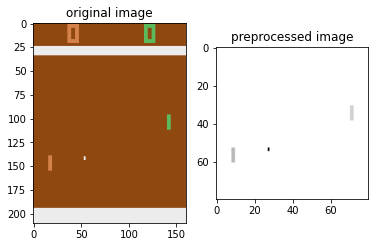

In [5]:
import matplotlib
import matplotlib.pyplot as plt

# show what a preprocessed image looks like
env.reset()
_, _, _, _ = env.step(0)
# get a frame after 20 steps
for _ in range(20):
    frame, _, _, _ = env.step(1)

plt.subplot(1,2,1)
plt.imshow(frame)
plt.title('original image')

plt.subplot(1,2,2)
plt.title('preprocessed image')

# 80 x 80 black and white image
plt.imshow(pong_utils.preprocess_single(frame), cmap='Greys')
plt.show()



# Policy

## Exercise 1: Implement your policy
 
Here, we define our policy. The input is the stack of two different frames (which captures the movement), and the output is a number $P_{\rm right}$, the probability of moving left. Note that $P_{\rm left}= 1-P_{\rm right}$

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Demo_Policy(nn.Module):

    def __init__(self):
        super(Policy, self).__init__()
        # 80x80x2 to 38x38x4
        # 2 channel from the stacked frame
        self.conv1 = nn.Conv2d(2, 4, kernel_size=6, stride=2, bias=False)
        # 38x38x4 to 9x9x32
        self.conv2 = nn.Conv2d(4, 16, kernel_size=6, stride=4)
        self.size=9*9*16
        
        # two fully connected layer
        self.fc1 = nn.Linear(self.size, 256)
        self.fc2 = nn.Linear(256, 1)

        # Sigmoid to 
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1,self.size)
        x = F.relu(self.fc1(x))
        return self.sig(self.fc2(x))


In [19]:

# set up a convolutional neural net
# the output is the probability of moving right
# P(left) = 1-P(right)
class Policy(nn.Module):

    def __init__(self):
        super(Policy, self).__init__()
        
        
    ########
    ## 
    ## Modify your neural network
    ##
    ########
        self.my_code = True
        if not self.my_code:
            # 80x80 to outputsize x outputsize
            # outputsize = (inputsize - kernel_size + stride)/stride 
            # (round up if not an integer)

            # output = 20x20 here

            self.conv = nn.Conv2d(2, 1, kernel_size=4, stride=4)
            self.size=1*20*20

            # 1 fully connected layer
            self.fc = nn.Linear(self.size, 1)
            self.sig = nn.Sigmoid()            
        
        else :
            # L1 ImgIn shape=(?, 80, 80, 2)
            # Conv -> (?, 40, 40, 4)
            # Pool -> (?, 20, 20, 4)
            self.layer1 = nn.Sequential(
                nn.Conv2d(2, 4, kernel_size=4, stride=2, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))

            # L2 ImgIn shape=(?, 20, 20, 4)
            # Conv -> (?, 10, 10, 4)
            # Pool -> (?, 5, 5, 16)
            self.layer2 = nn.Sequential(
                nn.Conv2d(4, 16, kernel_size=4, stride=2, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))


            # L3 FC 5x5x16 inputs -> 400 outputs
            self.layer3 = nn.Sequential(
                nn.Linear(400, 1024, bias=True),
                torch.nn.ReLU())

            # L5 FC 1024 inputs -> 1 outputs
            self.layer4 = nn.Sequential(
                nn.Linear(1024, 400, bias=True),
                torch.nn.ReLU())


            # L6 FC 400 inputs -> 1 outputs
            self.layer5 = nn.Sequential(
                nn.Linear(400, 1),
                torch.nn.Sigmoid())
        
        
        
    def forward(self, x):
        
    ########
    ## 
    ## Modify your neural network
    ##
    ########
        
        if not self.my_code:
            x = F.relu(self.conv(x))
            # flatten the tensor
            x = x.view(-1,self.size)
            return self.sig(self.fc(x))

        else:
            out = self.layer1(x)
            out = self.layer2(out)
            out = out.view(out.size(0), -1)   # Flatten them for FC
            out = self.layer3(out)
            out = self.layer4(out)
            out = self.layer5(out) 
            return out


In [20]:

# use your own policy!
torch.manual_seed(1)
policy=Policy().to(device)

print(policy)
#policy=pong_utils.Policy().to(device)

# we use the adam optimizer with learning rate 2e-4
# optim.SGD is also possible
import torch.optim as optim
optimizer = optim.Adam(policy.parameters(), lr=1e-4)

Policy(
  (layer1): Sequential(
    (0): Conv2d(2, 4, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(4, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=400, out_features=1024, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=1024, out_features=400, bias=True)
    (1): ReLU()
  )
  (layer5): Sequential(
    (0): Linear(in_features=400, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


# Game visualization
pong_utils contain a play function given the environment and a policy. An optional preprocess function can be supplied. Here we define a function that plays a game and shows learning progress

In [21]:
pong_utils.play(env, policy, time=100, preprocess=pong_utils.preprocess_single) 
# try to add the option "preprocess=pong_utils.preprocess_single"
# to see what the agent sees

# Rollout
Before we start the training, we need to collect samples. To make things efficient we use parallelized environments to collect multiple examples at once

In [22]:
envs = pong_utils.parallelEnv('PongDeterministic-v4', n=4, seed=12345)
prob, state, action, reward = pong_utils.collect_trajectories(envs, policy, tmax=100)

In [23]:
print(reward)

[array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([-1., -1.,  0., -1.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0

# Function Definitions
Here you will define key functions for training. 

## Exercise 2: write your own function for training
(this is the same as policy_loss except the negative sign)

### REINFORCE
you have two choices (usually it's useful to divide by the time since we've normalized our rewards and the time of each trajectory is fixed)

1. $\frac{1}{T}\sum^T_t R_{t}^{\rm future}\log(\pi_{\theta'}(a_t|s_t))$
2. $\frac{1}{T}\sum^T_t R_{t}^{\rm future}\frac{\pi_{\theta'}(a_t|s_t)}{\pi_{\theta}(a_t|s_t)}$ where $\theta'=\theta$ and make sure that the no_grad is enabled when performing the division

In [24]:
# Solution

import numpy as np

RIGHT = 4
LEFT = 5

# convert states to probability, passing through the policy
def states_to_prob(policy, states):
    states = torch.stack(states)
    policy_input = states.view(-1,*states.shape[-3:])
    return policy(policy_input).view(states.shape[:-3])

def surrogate(policy, old_probs, states, actions, rewards, discount = 0.995, beta=0.01):

    discount = discount**np.arange(len(rewards))
    rewards = np.asarray(rewards)*discount[:,np.newaxis]
    
    # convert rewards to future rewards
    rewards_future = rewards[::-1].cumsum(axis=0)[::-1]
    
    mean = np.mean(rewards_future, axis=1)
    std = np.std(rewards_future, axis=1) + 1.0e-10

    rewards_normalized = (rewards_future - mean[:,np.newaxis])/std[:,np.newaxis]
    
    # convert everything into pytorch tensors and move to gpu if available
    actions = torch.tensor(actions, dtype=torch.int8, device=device)
    old_probs = torch.tensor(old_probs, dtype=torch.float, device=device)
    rewards = torch.tensor(rewards_normalized, dtype=torch.float, device=device)

    # convert states to policy (or probability)
    new_probs = states_to_prob(policy, states)
    new_probs = torch.where(actions == RIGHT, new_probs, 1.0-new_probs)

    ratio = new_probs/old_probs

    # include a regularization term
    # this steers new_policy towards 0.5
    # add in 1.e-10 to avoid log(0) which gives nan
    entropy = -(new_probs*torch.log(old_probs+1.e-10)+ \
        (1.0-new_probs)*torch.log(1.0-old_probs+1.e-10))

    return torch.mean(ratio*rewards + beta*entropy)

Lsur= surrogate(policy, prob, state, action, reward)

print(Lsur)

tensor(0.0069, device='cuda:0', grad_fn=<MeanBackward0>)


In [25]:
def my_surrogate(policy, old_probs, states, actions, rewards, discount = 0.995, beta=0.01):

    ########
    ## 
    ## WRITE YOUR OWN CODE HERE
    ##
    ########
    
    discounts = [discount**i for i in range(len(rewards))]
    R = [a*b for a, b in zip(discounts, rewards)]
    
    # convert rewards to future rewards
    R_future = np.cumsum(R)
    print(old_probs)
    print(R)
    print(R_future)
    
    actions = torch.tensor(actions, dtype=torch.int8, device=device)
      
    
    # convert states to policy (or probability)
    new_probs = pong_utils.states_to_prob(policy, states)
    new_probs = torch.where(actions == pong_utils.RIGHT, new_probs, 1.0-new_probs)

    # include a regularization term
    # this steers new_policy towards 0.5
    # which prevents policy to become exactly 0 or 1
    # this helps with exploration
    # add in 1.e-10 to avoid log(0) which gives nan
    entropy = -(new_probs*torch.log(old_probs+1.e-10)+ \
        (1.0-new_probs)*torch.log(1.0-old_probs+1.e-10))

    return torch.mean(beta*entropy)


#Lsur= my_surrogate(policy, prob, state, action, reward)

#print(Lsur)

# Training
We are now ready to train our policy!
WARNING: make sure to turn on GPU, which also enables multicore processing. It may take up to 45 minutes even with GPU enabled, otherwise it will take much longer!

In [ ]:
from parallelEnv import parallelEnv
import numpy as np
# WARNING: running through all 800 episodes will take 30-45 minutes

# training loop max iterations
episode = 5000
# episode = 800

# widget bar to display progress
!pip install progressbar
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=episode).start()

# initialize environment
envs = parallelEnv('PongDeterministic-v4', n=8, seed=1234)

discount_rate = .99
beta = .01
tmax = 320

# keep track of progress
mean_rewards = []

for e in range(episode):

    # collect trajectories
    old_probs, states, actions, rewards = \
        pong_utils.collect_trajectories(envs, policy, tmax=tmax)
        
    total_rewards = np.sum(rewards, axis=0)

    # this is the SOLUTION!
    # use your own surrogate function
    # L = -surrogate(policy, old_probs, states, actions, rewards, beta=beta)
    
    L = -pong_utils.surrogate(policy, old_probs, states, actions, rewards, beta=beta)
    optimizer.zero_grad()
    L.backward()
    optimizer.step()
    del L
        
    # the regulation term also reduces
    # this reduces exploration in later runs
    beta*=.995
    
    # get the average reward of the parallel environments
    mean_rewards.append(np.mean(total_rewards))
    
    # display some progress every 20 iterations
    if (e+1)%20 ==0 :
        print("Episode: {0:d}, score: {1:f}".format(e+1,np.mean(total_rewards)))
        print(total_rewards)
        
    # update progress widget bar
    timer.update(e+1)
    
timer.finish()
    

Defaulting to user installation because normal site-packages is not writeable


Episode: 20, score: -11.625000
[-12. -12.  -9. -14. -15.  -6. -15. -10.]


Episode: 40, score: -11.375000
[ -8. -11. -11. -11. -13. -12. -16.  -9.]


Episode: 60, score: -11.750000
[-12. -11. -11. -14.  -9. -14.  -9. -14.]


Episode: 80, score: -12.375000
[-16. -10. -13. -12. -13.  -9. -13. -13.]


Episode: 100, score: -12.500000
[-13. -15. -11.  -5. -13. -12. -16. -15.]


Episode: 120, score: -12.000000
[-12. -12. -12. -14.  -8. -12. -12. -14.]


Episode: 140, score: -12.125000
[-16. -14. -12. -15. -13. -12. -10.  -5.]


Episode: 160, score: -11.250000
[ -5. -13. -13. -12. -12. -13. -12. -10.]


Episode: 180, score: -12.375000
[-12. -14. -15. -13. -13.  -8. -11. -13.]


Episode: 200, score: -12.625000
[-14. -11. -11. -13. -15. -14. -11. -12.]


Episode: 220, score: -10.250000
[-12.  -4. -16. -11. -13. -12.  -8.  -6.]


Episode: 240, score: -12.125000
[-13. -13. -14. -15. -11.  -8. -13. -10.]


Episode: 260, score: -12.625000
[ -9. -12. -16. -13. -11. -14. -15. -11.]


Episode: 280, score: -10.375000
[-12. -14. -14.  -4.  -8. -10.  -7. -14.]


Episode: 300, score: -10.125000
[-12.  -9. -13.  -9. -10. -12.  -5. -11.]


Episode: 320, score: -9.750000
[ -8. -11. -10.  -8.  -7. -10. -13. -11.]


Episode: 340, score: -9.625000
[-10. -12. -10.  -8.  -9. -11. -10.  -7.]


Episode: 360, score: -10.875000
[-11.  -9. -11. -12. -14. -15.  -9.  -6.]


Episode: 380, score: -10.250000
[-12. -13.  -6. -11.  -9. -16. -10.  -5.]


Episode: 400, score: -11.000000
[-13. -10. -11.  -9. -11. -13. -11. -10.]


Episode: 420, score: -8.250000
[ -7.  -9.  -9. -11.  -9.  -7.  -8.  -6.]


In [27]:
# play game after training!
pong_utils.play(env, policy, time=2000) 

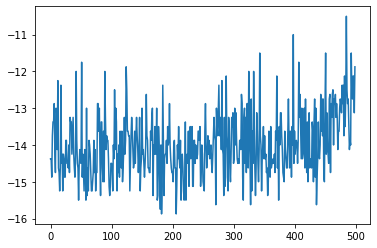

In [28]:
plt.plot(mean_rewards)

In [ ]:
# save your policy!
torch.save(policy, 'REINFORCE.policy')

# load your policy if needed
# policy = torch.load('REINFORCE.policy')

# try and test out the solution!
# policy = torch.load('PPO_solution.policy')